IMPORTING MODULES

In [52]:
import torch
from torch import nn

import requests
import zipfile
from pathlib import Path

import random 
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

HYPERPARAMETERS

In [8]:
INPUT_SHAPE = 0
HIDDEN_UNITS = 0
OUPUT_SHAPE = 3

EPOCHS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

Downloading Dataset

In [7]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
    print(f"creating {image_path}...")
    image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print(f"Unziping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

print("DONE!")


data/pizza_steak_sushi directory already exists
Unziping pizza, steak, sushi data...
DONE!


SETTING DATA

pizza
Random image path: data/pizza_steak_sushi/test/pizza/2236338.jpg
Image class: pizza
Image height: 512
Image width: 512


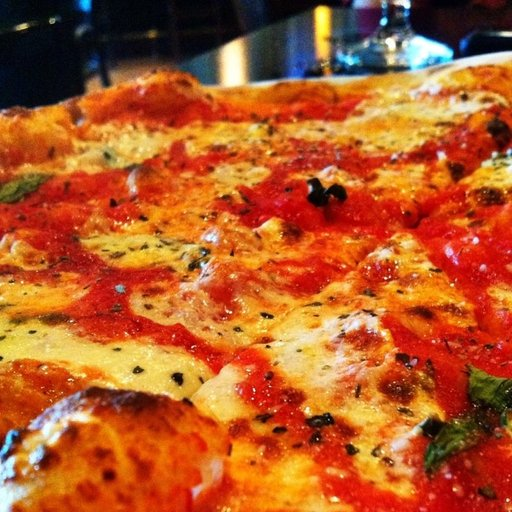

In [54]:
train_dir = image_path / "train"
test_dir = image_path / "test"

random.seed(42)
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Pick a random image path
random_image_path = random.choice(image_path_list)

# Get image class from path name 
image_class = random_image_path.parent.stem
print(image_class)

# Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

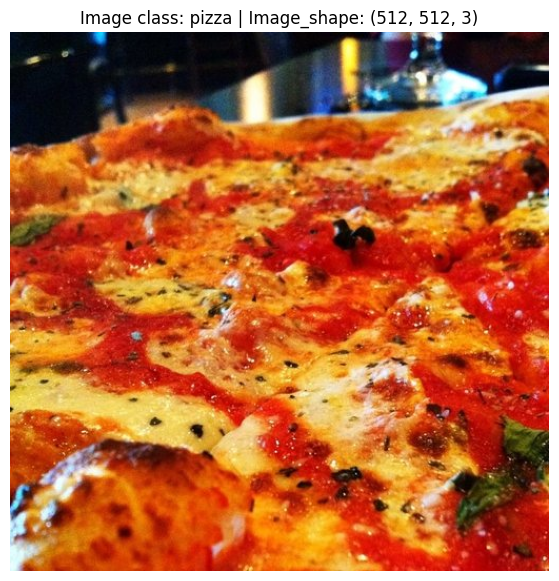

In [56]:
img_as_array = np.array(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image_shape: {img_as_array.shape}")
plt.axis(False)